# Multivariate Linear Regression

### Importing Modules and Opening CSV

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


df = pd.read_csv('dataframe_for_model.csv')
df

,Unnamed: 0,Bedrooms,Bathrooms,Total interior livable area,Elementary School Score,Middle School Score,High School Score,Tax assessed value,Annual tax amount,Listed Price,City
0,1,3,2.0,872.0,3.0,2.0,2.0,505000.0,6253.0,525000.0,Los Angeles
1,3,5,3.0,2612.0,9.0,7.0,8.0,1775000.0,20787.0,1895000.0,Culver City
2,10,4,2.0,1579.0,7.0,5.0,6.0,71347.0,904.0,1428000.0,Santa Clara
3,12,6,3.0,3351.0,8.0,7.0,7.0,2080800.0,25099.0,2250000.0,San Francisco
4,18,3,2.0,2100.0,6.0,6.0,8.0,1836000.0,21521.0,2390000.0,San Mateo
...,...,...,...,...,...,...,...,...,...,...,...
12486,47425,4,3.0,2219.0,7.0,7.0,9.0,900775.0,12719.0,1224888.0,San Jose
12487,47427,4,5.0,4680.0,7.0,5.0,7.0,2360150.0,25283.0,2569000.0,Villa Park
12488,47436,3,2.0,1860.0,7.0,3.0,7.0,578000.0,7211.0,2295000.0,Los Angeles
12489,47437,3,3.0,2125.0,7.0,7.0,8.0,484696.0,7627.0,499888.0,Elk Grove


Our dataset as is has 11 columns, 10 numerical and 1 categorical (City). Our aim is to use a combination of the 1 categorical variable and 9 numerical variables to predict "Listed Price."

In [2]:
cities_df = pd.read_csv('cities_coord.csv')
cities_df

,City,Latitude,Longitude
0,Acampo,38.174640,-121.278559
1,Aguanga,33.442809,-116.865024
2,Alameda,37.609029,-121.899142
3,Alamo,37.850203,-122.032184
4,Albany,37.886870,-122.297747
...,...,...,...
397,Yolo,38.718454,-121.905900
398,Yorba Linda,33.890110,-117.824971
399,Yountville,38.402201,-122.359506
400,Yuba City,39.140448,-121.616911


In [3]:
cities_df = cities_df.set_index('City')

In [4]:
df[['Lat', 'Long']] = cities_df.loc[df["City"]].values
df

,Unnamed: 0,Bedrooms,Bathrooms,Total interior livable area,Elementary School Score,Middle School Score,High School Score,Tax assessed value,Annual tax amount,Listed Price,City,Lat,Long
0,1,3,2.0,872.0,3.0,2.0,2.0,505000.0,6253.0,525000.0,Los Angeles,34.053691,-118.242766
1,3,5,3.0,2612.0,9.0,7.0,8.0,1775000.0,20787.0,1895000.0,Culver City,34.021122,-118.396466
2,10,4,2.0,1579.0,7.0,5.0,6.0,71347.0,904.0,1428000.0,Santa Clara,37.233325,-121.684635
3,12,6,3.0,3351.0,8.0,7.0,7.0,2080800.0,25099.0,2250000.0,San Francisco,37.779026,-122.419906
4,18,3,2.0,2100.0,6.0,6.0,8.0,1836000.0,21521.0,2390000.0,San Mateo,37.496904,-122.333057
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12486,47425,4,3.0,2219.0,7.0,7.0,9.0,900775.0,12719.0,1224888.0,San Jose,37.336166,-121.890591
12487,47427,4,5.0,4680.0,7.0,5.0,7.0,2360150.0,25283.0,2569000.0,Villa Park,33.814754,-117.820623
12488,47436,3,2.0,1860.0,7.0,3.0,7.0,578000.0,7211.0,2295000.0,Los Angeles,34.053691,-118.242766
12489,47437,3,3.0,2125.0,7.0,7.0,8.0,484696.0,7627.0,499888.0,Elk Grove,38.408799,-121.371618


In [5]:
df = df.drop(columns=["Unnamed: 0", "City"])
df

,Bedrooms,Bathrooms,Total interior livable area,Elementary School Score,Middle School Score,High School Score,Tax assessed value,Annual tax amount,Listed Price,Lat,Long
0,3,2.0,872.0,3.0,2.0,2.0,505000.0,6253.0,525000.0,34.053691,-118.242766
1,5,3.0,2612.0,9.0,7.0,8.0,1775000.0,20787.0,1895000.0,34.021122,-118.396466
2,4,2.0,1579.0,7.0,5.0,6.0,71347.0,904.0,1428000.0,37.233325,-121.684635
3,6,3.0,3351.0,8.0,7.0,7.0,2080800.0,25099.0,2250000.0,37.779026,-122.419906
4,3,2.0,2100.0,6.0,6.0,8.0,1836000.0,21521.0,2390000.0,37.496904,-122.333057
...,...,...,...,...,...,...,...,...,...,...,...
12486,4,3.0,2219.0,7.0,7.0,9.0,900775.0,12719.0,1224888.0,37.336166,-121.890591
12487,4,5.0,4680.0,7.0,5.0,7.0,2360150.0,25283.0,2569000.0,33.814754,-117.820623
12488,3,2.0,1860.0,7.0,3.0,7.0,578000.0,7211.0,2295000.0,34.053691,-118.242766
12489,3,3.0,2125.0,7.0,7.0,8.0,484696.0,7627.0,499888.0,38.408799,-121.371618


In [6]:
df = df[[col for col in df.columns if col != "Listed Price"] + ["Listed Price"]]
df

,Bedrooms,Bathrooms,Total interior livable area,Elementary School Score,Middle School Score,High School Score,Tax assessed value,Annual tax amount,Lat,Long,Listed Price
0,3,2.0,872.0,3.0,2.0,2.0,505000.0,6253.0,34.053691,-118.242766,525000.0
1,5,3.0,2612.0,9.0,7.0,8.0,1775000.0,20787.0,34.021122,-118.396466,1895000.0
2,4,2.0,1579.0,7.0,5.0,6.0,71347.0,904.0,37.233325,-121.684635,1428000.0
3,6,3.0,3351.0,8.0,7.0,7.0,2080800.0,25099.0,37.779026,-122.419906,2250000.0
4,3,2.0,2100.0,6.0,6.0,8.0,1836000.0,21521.0,37.496904,-122.333057,2390000.0
...,...,...,...,...,...,...,...,...,...,...,...
12486,4,3.0,2219.0,7.0,7.0,9.0,900775.0,12719.0,37.336166,-121.890591,1224888.0
12487,4,5.0,4680.0,7.0,5.0,7.0,2360150.0,25283.0,33.814754,-117.820623,2569000.0
12488,3,2.0,1860.0,7.0,3.0,7.0,578000.0,7211.0,34.053691,-118.242766,2295000.0
12489,3,3.0,2125.0,7.0,7.0,8.0,484696.0,7627.0,38.408799,-121.371618,499888.0


### Defining X and Y

In [7]:
X = df.drop(['Listed Price'], axis=1)
y = df["Listed Price"].values

In [8]:
# splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

## Creating a Linear Model

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [10]:
y_pred = lr.predict(X_test) # using linear model to predict y values from test set
print(y_pred)

[1037315.16120537 2383599.22943654  295386.28820364 ...  -21216.7708835
 1216016.27939709 2869320.92660592]


In [11]:
print(r2_score(y_test, y_pred)) # calculating r-score
print(f'Testing MSE error is: {round(mean_squared_error(y_pred, y_test),4)}') # testing MSE

0.5832277709489465
Testing MSE error is: 1130012010107.439


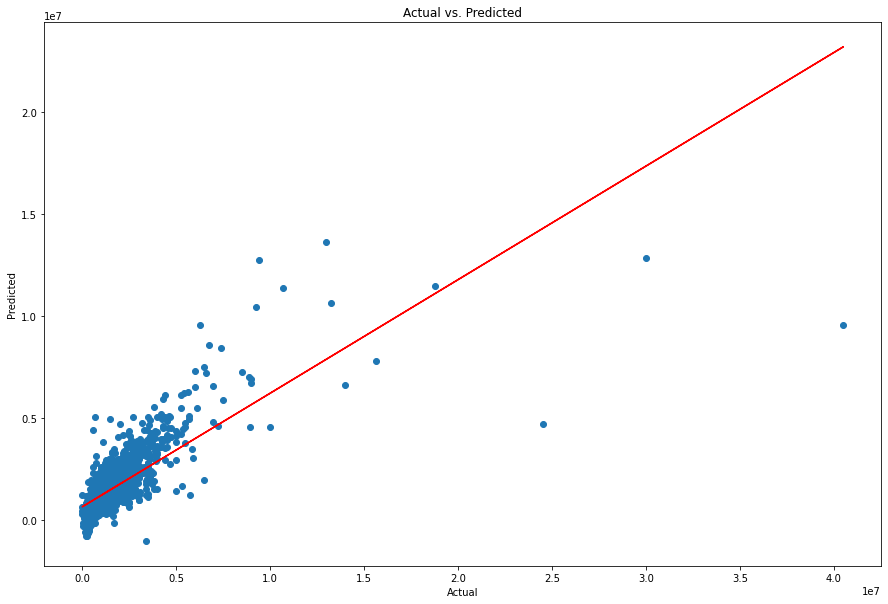

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted")

m,b = np.polyfit(y_test, y_pred,1)
plt.plot(y_test, m*y_test+b, color='red')

The plot above depicts the relationship between our test set and their predicted values. Based on the linear regression line, the general trend of data, and r^2 score of ~58%, we can say that our linear model is decent in predicting the listed prices of California houses. The regression score, which is based on 10 variables, gives us an accuracy of approximately 58%. This score is _OK_, but the scatter also indicates some variability. We can try to increase this accuracy score with additional regression techniques.

In [13]:
pred_y_df = pd.DataFrame({"Actual Value": y_test, "Predicted Value": y_pred, "Difference": abs(y_test - y_pred)})

pred_y_df[0:10]

,Actual Value,Predicted Value,Difference
0,915000.0,1.037315e+06,122315.161205
1,1938000.0,2.383599e+06,445599.229437
2,750000.0,2.953863e+05,454613.711796
3,139900.0,3.875663e+04,101143.374519
4,1899000.0,2.198691e+06,299691.438396
5,3888000.0,4.353186e+06,465186.175225
6,1250000.0,9.409407e+05,309059.348916
7,1111000.0,7.229278e+05,388072.226989
8,869500.0,1.081211e+06,211710.846863
9,2348000.0,1.966964e+06,381035.522972


The table above shows us our actual value (`y_test` values) against their predictions based on the model (`y_pred`). We also look at their differences, which seems to vary quite a bit. The difference is large, but this is somewhat expected due to house listing prices being high to begin with.

In [14]:
test_random = df.drop("Listed Price",axis=1).iloc[0].tolist()
test_random

[3.0, 2.0, 872.0, 3.0, 2.0, 2.0, 505000.0, 6253.0, 34.0536909, -118.242766]

In [15]:
test_result = lr.predict([test_random])

/Users/shrisub01/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [16]:
nums = list(range(0,2499))

In [17]:
len(nums)

2499

In [18]:
test_result

array([150688.16333066])

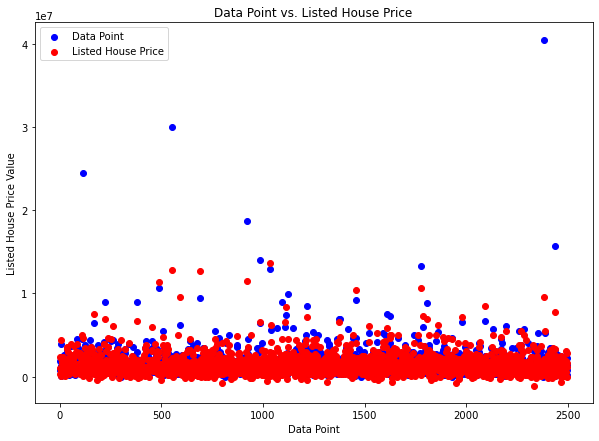

In [19]:
plt.figure(figsize=(10,7))

plt.scatter(nums,pred_y_df["Actual Value"], color="blue")
plt.scatter(nums,pred_y_df["Predicted Value"], color="red")

plt.xlabel("Data Point")
plt.ylabel("Listed House Price Value")
plt.title("Data Point vs. Listed House Price")
plt.legend(['Data Point', 'Listed House Price'])

plt.show()

In [20]:
df["Listed Price"][0] - test_result

array([374311.83666934])

## Multicollinearity Check

After running a linear model, the next form of action might be to create a multivariate polynomial model. However, before doing so, it is important to look at the variables to test for any interactions/correlations between the predictor variables themselves. If this does exist, this could be a problem, as our statistical inferences will be less reliable. In other words, if there are existing correlations within the predictor variables, we cannot say (without bias) that the target variable is being predicted accurately. Therefore, we can run a multicollinearity check on our numerical variables using the `VIF` library.

In [21]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

X = df.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,Bedrooms,25.141863
1,Bathrooms,18.677506
2,Total interior livable area,16.967281
3,Elementary School Score,15.795502
4,Middle School Score,17.641309
5,High School Score,22.022347
6,Tax assessed value,113.698171
7,Annual tax amount,118.724789
8,Lat,1044.244869
9,Long,1031.373588


City is not included in this analysis as it is not a numerical variable.

"We can see here that the many variables have a high VIF value, meaning they can be predicted by other independent variables in the dataset.

Although correlation matrix and scatter plots can also be used to find multicollinearity, their findings only show the bivariate relationship between the independent variables. VIF is preferred as it can show the correlation of a variable with a group of other variables."

- Cited by https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/

Now, we rerun our multicollinearity check without the categorical variable and our target variable.

In [22]:
X = df.drop(["Listed Price"],axis=1)
calc_vif(X)

,variables,VIF
0,Bedrooms,25.141863
1,Bathrooms,18.677506
2,Total interior livable area,16.967281
3,Elementary School Score,15.795502
4,Middle School Score,17.641309
5,High School Score,22.022347
6,Tax assessed value,113.698171
7,Annual tax amount,118.724789
8,Lat,1044.244869
9,Long,1031.373588


Looking at all the variables (excluding categorical), we can see that many variables are highly correlated with each other. This can produce a major problem for our multiple polynomial model, as we may not be able to recognize which variables are responsible for the output variable.

However, we can combine the correlated variables and drop the others to predict "Listed Price" in future models. This not only produces a cleaner dataset, but can perhaps provide us with a more reliable model.

In [23]:
df2 = df.copy()
df2['Bedrooms_Bathrooms'] = df.apply(lambda x: x['Bedrooms'] - x['Bathrooms'],axis=1)

df2['School_Score'] = df.apply(lambda x: (x['Elementary School Score'] + x['Middle School Score'] +
                                                                          x['High School Score'])/3,axis=1)

df2['Tax_value'] = df.apply(lambda x: x['Tax assessed value'] - x['Annual tax amount'],axis=1)


X = df2.drop(['Listed Price','Bedrooms','Bathrooms', 'Elementary School Score', 'Middle School Score',
             'High School Score', 'Tax assessed value', 'Annual tax amount', "Lat", "Long"],axis=1)
calc_vif(X)

,variables,VIF
0,Total interior livable area,6.517500
1,Bedrooms_Bathrooms,1.977335
2,School_Score,5.817968
3,Tax_value,2.846175


At this point, we've combined the variables that are correlated with one another. While the VIF score is still not perfect, it is a lot better than before. However, based on our initial analysis, it is difficult to create a precise multivariate polynomial model as we had to drop/combine many variables to reduce the interaction effects of many variables. However, using these refined variables, we can test to see whether or not the new dataset has a positive impact on the linear regression model and accuracy score.

In [24]:
df2 = df2[['Total interior livable area', 'Bedrooms_Bathrooms', 'School_Score', 'Tax_value',"Lat", "Long",
           "Listed Price"]]
df2

,Total interior livable area,Bedrooms_Bathrooms,School_Score,Tax_value,Lat,Long,Listed Price
0,872.0,1.0,2.333333,498747.0,34.053691,-118.242766,525000.0
1,2612.0,2.0,8.000000,1754213.0,34.021122,-118.396466,1895000.0
2,1579.0,2.0,6.000000,70443.0,37.233325,-121.684635,1428000.0
3,3351.0,3.0,7.333333,2055701.0,37.779026,-122.419906,2250000.0
4,2100.0,1.0,6.666667,1814479.0,37.496904,-122.333057,2390000.0
...,...,...,...,...,...,...,...
12486,2219.0,1.0,7.666667,888056.0,37.336166,-121.890591,1224888.0
12487,4680.0,-1.0,6.333333,2334867.0,33.814754,-117.820623,2569000.0
12488,1860.0,1.0,5.666667,570789.0,34.053691,-118.242766,2295000.0
12489,2125.0,0.0,7.333333,477069.0,38.408799,-121.371618,499888.0


In [25]:
X = df2.drop(['Listed Price'], axis=1)
y = df2["Listed Price"].values

We can now use this edited dataframe to rerun our linear regression and see how that changes our scores and accuracy.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=5)

In [27]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = lr.predict(X_test) # using linear model to predict y values from test set
#print(y_pred)

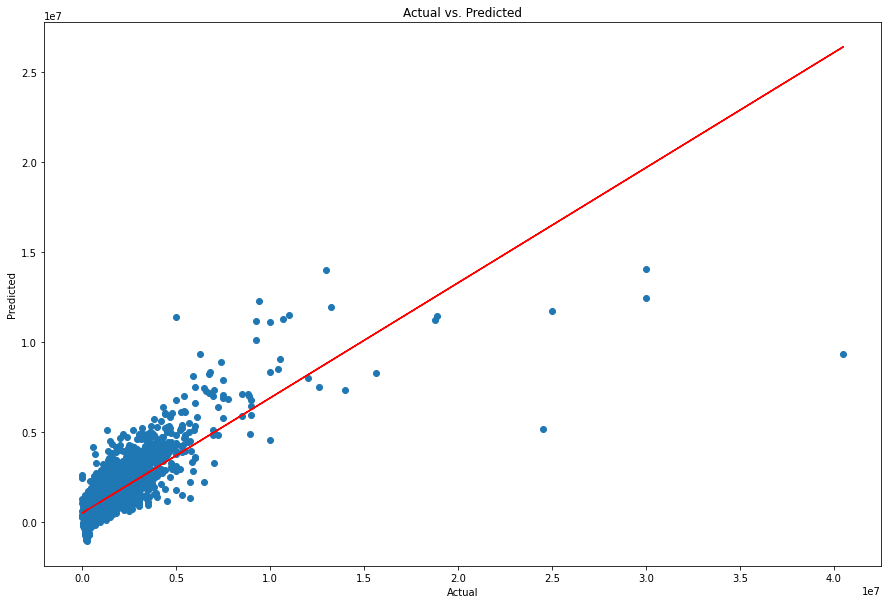

In [29]:
plt.figure(figsize=(15,10))

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted")

m,b = np.polyfit(y_test, y_pred,1)
plt.plot(y_test, m*y_test+b, color='red')

In [30]:
print(r2_score(y_test, y_pred)) # calculating r-score
#print(f'Testing MSE error is: {round(mean_squared_error(y_pred, y_test),4)}') # testing MSE

0.6383750021459081


In [31]:
pred_y_df = pd.DataFrame({"Actual Value": y_test, "Predicted Value": y_pred, "Residual Difference": abs(y_test - y_pred)})

pred_y_df[0:10]

,Actual Value,Predicted Value,Residual Difference
0,915000.0,1.018500e+06,103499.916798
1,1938000.0,2.506262e+06,568262.237815
2,750000.0,4.010147e+05,348985.294996
3,139900.0,-1.554112e+05,295311.180079
4,1899000.0,2.380688e+06,481688.304955
5,3888000.0,4.407490e+06,519490.366235
6,1250000.0,8.447486e+05,405251.387762
7,1111000.0,5.774056e+05,533594.365266
8,869500.0,1.107191e+06,237690.596057
9,2348000.0,2.161615e+06,186384.734618


In [32]:
nums = list(range(0,4997))
#nums

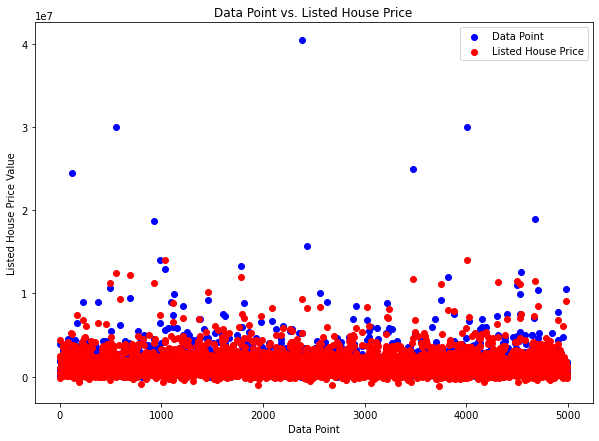

In [33]:
plt.figure(figsize=(10,7))

plt.scatter(nums,pred_y_df["Actual Value"], color="blue")
plt.scatter(nums,pred_y_df["Predicted Value"], color="red")

plt.xlabel("Data Point")
plt.ylabel("Listed House Price Value")
plt.title("Data Point vs. Listed House Price")
plt.legend(['Data Point', 'Listed House Price'])

plt.show()

With the plot above, we can see that that a linear regression model may not be enough to capture the model's trend. However it is notable that the R^2 and MSE increased and decreased, respectively. The changes are not major, so we have to attempt other models.

In [34]:
test_random = df2.drop("Listed Price",axis=1).iloc[0].tolist()
test_random

[872.0, 1.0, 2.3333333333333335, 498747.0, 34.0536909, -118.242766]

In [35]:
test_result = lr.predict([test_random])
test_result

/Users/shrisub01/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([280298.77326927])

In [36]:
df["Listed Price"][0] - test_result

array([244701.22673073])

# L1 & L2 Regression (Lasso and Ridge)

As seen in our multicollinearity check above, we can deduce that the features with a high VIF value likely have very high coefficients. This implies that our dependent variable (Listed Price) would be significantly overpowered by those features, which can lead to overfitting. We can employ L1 and L2 Regression to reduce model complexity and avoid overfitting. 

## Simple Ridge and Lasso

In [37]:
# libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler

In [38]:
# moving Listed Price variable to the end

df2 = df[ [ col for col in df.columns if col != 'Listed Price' ] + ['Listed Price']]

In [39]:
X = df2.drop("Listed Price", axis=1)
y = df2["Listed Price"]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=11)

In [41]:
reg = LinearRegression().fit(X_train, y_train)

In [42]:
reg.score(X_test, y_test) # REGRESSION SCORE FOR TEST DATA!!

0.6371251171724626

Looking at the score of the test set, we can see that it isn't too low. For data that the model has never seen before, it is fitting the data with ~65% accuracy. We can test this with the training data to see if there was any significant overfitting.

In [43]:
reg.score(X_train, y_train)

0.688669466095837

Based on the training score, we can see that the accuracy score went up slightly, around 3%. This isn't bad, but we can perhaps employ L1 and L2 to see if we adjust and balance for any potential overfitting.

In [44]:
lasso_reg = linear_model.Lasso(alpha=50, max_iter=10000, tol=0.01)

lasso_reg.fit(X_train, y_train)

Lasso(alpha=50, max_iter=10000, tol=0.01)

In [45]:
print(lasso_reg.score(X_train, y_train))
print(lasso_reg.score(X_test, y_test)) # REGRESSION SCORE FOR TEST DATA!!

0.6886694483761305
0.6371260663248648


In [46]:
y_pred = lasso_reg.predict(X_test)
print(y_pred)

[1898596.41106045 1269053.62691972 1463841.50445456 ...  924798.22323446
  848804.13482629 1214265.83624752]


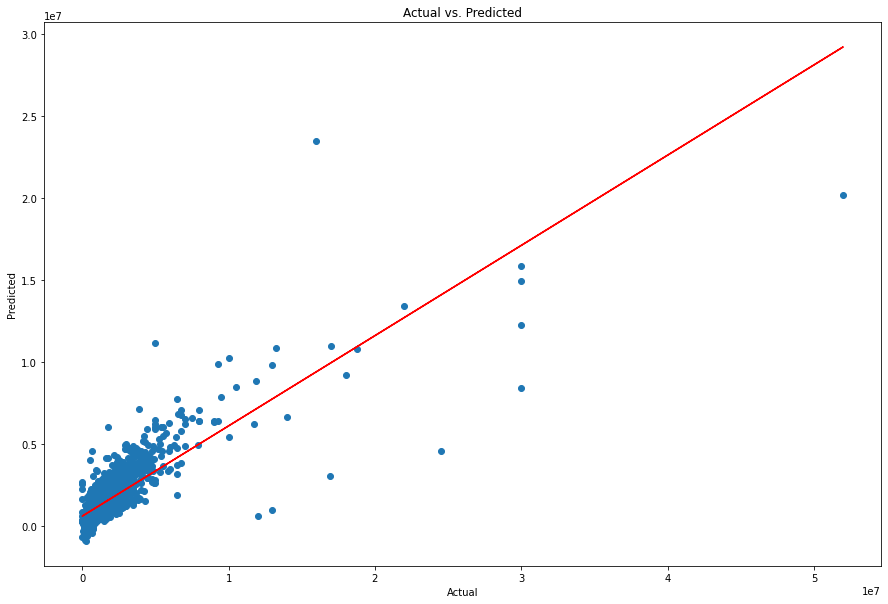

In [47]:
plt.figure(figsize=(15,10))


plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted")


m,b = np.polyfit(y_test, y_pred,1)
plt.plot(y_test, m*y_test+b, color='red')

In [48]:
ridge_reg = Ridge(alpha=50, max_iter=10000, tol=0.01)

ridge_reg.fit(X_train, y_train)

Ridge(alpha=50, max_iter=10000, tol=0.01)

In [49]:
print(ridge_reg.score(X_train, y_train))
print(ridge_reg.score(X_test, y_test)) # REGRESSION SCORE FOR TEST DATA!!!

0.6886526128381768
0.637138720642793


In [50]:
y_pred = ridge_reg.predict(X_test)
print(y_pred)

[1899236.84423683 1274308.30017363 1462448.68748004 ...  923056.48474152
  847512.61123347 1208839.12078266]


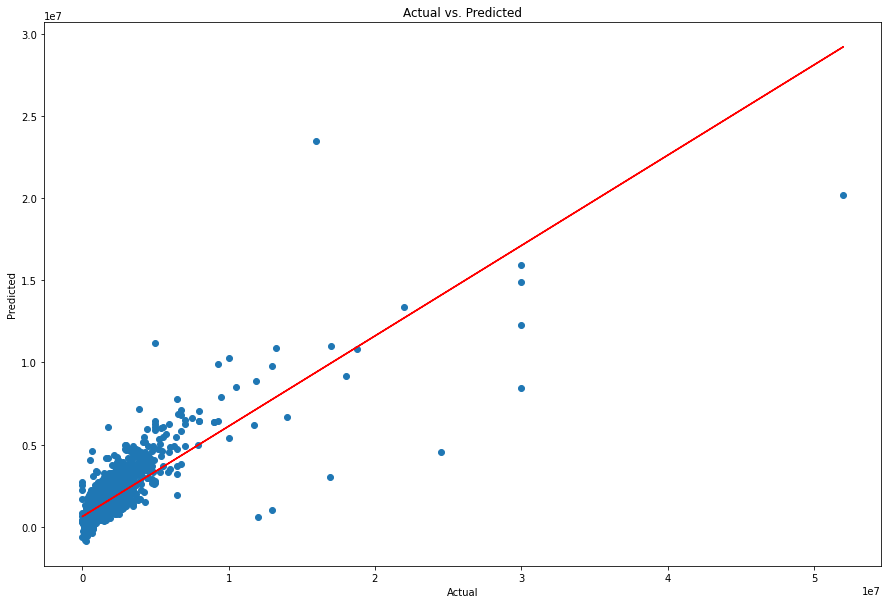

In [51]:
plt.figure(figsize=(15,10))


plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted")


m,b = np.polyfit(y_test, y_pred,1)
plt.plot(y_test, m*y_test+b, color='red')

## Ridge and Lasso - An Extension

### Ridge

"The Ridge() function has an alpha argument ( λ , but with a different name!) that is used to tune the model. We'll generate an array of alpha values ranging from very big to very small, essentially covering the full range of scenarios from the null model containing only the intercept, to the least squares fit:"

In [52]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

"Associated with each alpha value is a vector of ridge regression coefficients, which we'll store in a matrix coefs. In this case, it is a  19×100  matrix, with 19 rows (one for each predictor) and 100 columns (one for each value of alpha). Remember that we'll want to standardize the variables so that they are on the same scale. To do this, we can use the normalize = True parameter:"

In [53]:
ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
     
np.shape(coefs)

(100, 10)

We expect the coefficient estimates to be much smaller, in terms of  l2  norm, when a large value of alpha is used, as compared to when a small value of alpha is used. Let's plot and find out:

Text(0, 0.5, 'weights')

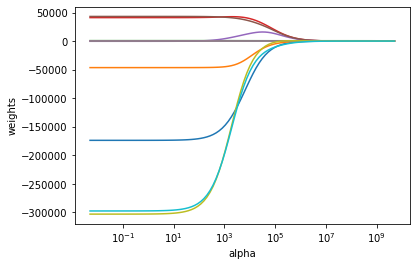

In [54]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [55]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [56]:
ridge2 = Ridge(alpha = 4)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred2))          # Calculate the test MSE

Bedrooms                      -161292.048908
Bathrooms                      -30923.457765
Total interior livable area       771.830832
Elementary School Score         41493.869569
Middle School Score              6333.740778
High School Score               39586.626779
Tax assessed value                 -0.308437
Annual tax amount                  73.952891
Lat                           -305848.051711
Long                          -301645.001683
dtype: float64
1031289579808.9991


In [57]:
ridge2 = Ridge(alpha = 0)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred = ridge2.predict(X_test)            # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred))           # Calculate the test MSE

Bedrooms                      -161444.419471
Bathrooms                      -30917.898140
Total interior livable area       772.010249
Elementary School Score         41482.055612
Middle School Score              6302.011760
High School Score               39591.604364
Tax assessed value                 -0.308281
Annual tax amount                  73.929664
Lat                           -306656.340980
Long                          -302399.624837
dtype: float64
1031288898265.9904


In [59]:
print(ridge2.score(X_train, y_train))
print(ridge2.score(X_test, y_test)) # REGRESSION SCORE FOR TEST DATA!!!

0.659150429088091
0.708400043621555


"Instead of arbitrarily choosing alpha  =4 , it would be better to use cross-validation to choose the tuning parameter alpha. We can do this using the cross-validated ridge regression function, RidgeCV(). By default, the function performs generalized cross-validation (an efficient form of LOOCV), though this can be changed using the argument cv."

In [61]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error')
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

16.372745814388658

In [62]:
ridge4 = Ridge(alpha = ridgecv.alpha_)
ridge4.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))

1031294241441.7521

In [63]:
print(ridge4.score(X_train, y_train))
print(ridge4.score(X_test, y_test)) # REGRESSION SCORE FOR TEST DATA!!!

0.6591490740786559
0.7083985328229596


In [65]:
ridge4.fit(X, y)
pd.Series(ridge4.coef_, index = X.columns)

Bedrooms                      -173272.943980
Bathrooms                      -46444.717638
Total interior livable area       793.230142
Elementary School Score         41099.221127
Middle School Score              -290.802235
High School Score               43093.091979
Tax assessed value                 -0.374336
Annual tax amount                  81.803164
Lat                           -300311.077903
Long                          -294964.392419
dtype: float64

### Lasso

Text(0, 0.5, 'weights')

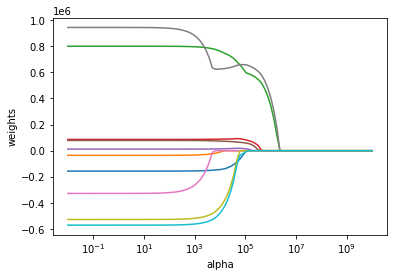

In [66]:
from sklearn.preprocessing import scale 

lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [67]:
lassocv = linear_model.LassoCV(alphas = None, cv = 10, max_iter = 100000)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

1462810764291.3665

In [68]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test)) # REGRESSION SCORE FOR TEST DATA!!!

0.5108469059161905
0.5863859721805471


"This is substantially lower than the test set MSE of the null model and of least squares, and only a little worse than the test MSE of ridge regression with alpha chosen by cross-validation.

However, the lasso has a substantial advantage over ridge regression in that the resulting coefficient estimates are sparse. Here we see that 8 of the 10 coefficient estimates are exactly zero:"

In [69]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X.columns)

Bedrooms                       0.000000
Bathrooms                      0.000000
Total interior livable area    0.000000
Elementary School Score        0.000000
Middle School Score            0.000000
High School Score              0.000000
Tax assessed value             1.016674
Annual tax amount              0.000000
Lat                            0.000000
Long                          -0.000000
dtype: float64

### Citation for the above:^ http://www.science.smith.edu/~jcrouser/SDS293/labs/lab10-py.html

## (need to add some explanations)